In [22]:
import perceval as pv 
from perceval.components import BS, PS
from perceval.rendering.circuit import SymbSkin, PhysSkin
import perceval.components.unitary_components as comp
from perceval.utils import BasicState, DensityMatrix
import numpy as np
from circuits import addPrep
from collections import Counter

In [23]:
def getFidelityRho1(counts):
    totCounts, validCounts = 0, 0

    for state in counts:
        totCounts += counts[state]
        if state[0] == 1 and state[1] == 0:
            validCounts += counts[state]

    return validCounts/totCounts


def getFidelityRho2(counts):
    totCounts, validCounts = 0, 0

    for state in counts:
        totCounts += counts[state]
        if state[2] == 1 and state[3] == 0:
            validCounts += counts[state]

    return validCounts/totCounts


def getFidelityRho(counts):
    totCounts, validCounts = 0, 0

    for state in counts:
        totCounts += counts[state]
        if state[0] == state[2] and state[1] == state[3]:
            validCounts += counts[state]

    return validCounts/totCounts

def costFunctionAtPhi(counts):
    return (1 - getFidelityRho1(counts))**2 + (1 - getFidelityRho2(counts))**2 + (getFidelityRho1(counts)-getFidelityRho2(counts))**2

def run_circuit(input, circuit,sample_count=10000):
        sv = input

        p = pv.Processor("SLOS", circuit)
        p.with_input(pv.BasicState([0, 1, 0, 1]))

        sampler = pv.algorithm.Sampler(p)  
        counts = sampler.sample_count(sample_count)['results']
        return counts

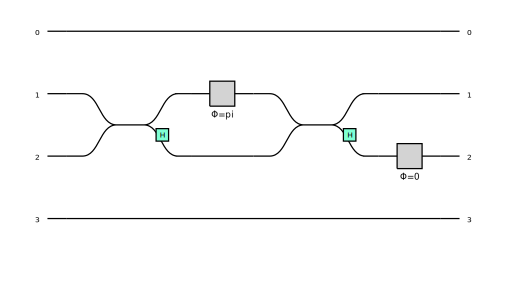

In [ ]:
qc = pv.Circuit(4)
addPrep(qc, 0, 0)
phase_shifter = comp.PS(np.pi/2) # phi = pi/2
# qc.add(0, BS.H())
# qc.add(0, phase_shifter)
# qc.add(0, BS.H())
# qc.add(1, phase_shifter)
pv.pdisplay(qc, skin=SymbSkin())


In [25]:
input = pv.StateVector([0,1,0,1])
run_circuit(input, qc)

BSCount(int, {|0,0,1,1>: 10000})